In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential # 我目前的版本是Keras==1.0.7
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

D:\programFiles\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


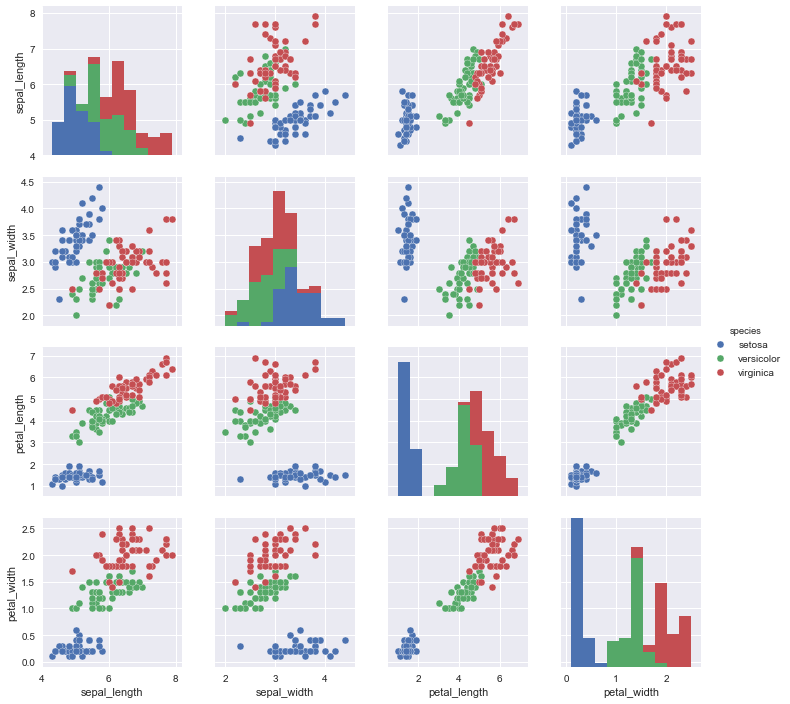

In [4]:
sns.pairplot(iris, hue='species');

## 1.[艺术化的图表控制](https://zhuanlan.zhihu.com/p/27435863)

+ 样式控制：axes_style() and set_style()
    + darkgrid 黑色网格（默认）
    + whitegrid 白色网格
    + dark 黑色背景
    + white 白色背景
    + ticks 四周都有刻度线的白背景
+ 用despine()进行边框控制
+ 查看 sns.axes_style()参数
+ 通过 plotting_context() 和 set_context() 调整绘图元素


### 样式控制：axes_style() and set_style()

In [64]:
# 定义绘图函数
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

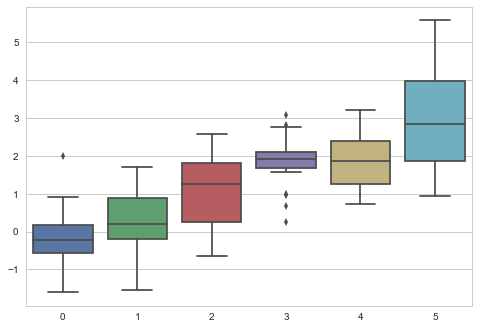

In [63]:
# 样式控制
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

### 用despine()进行边框控制

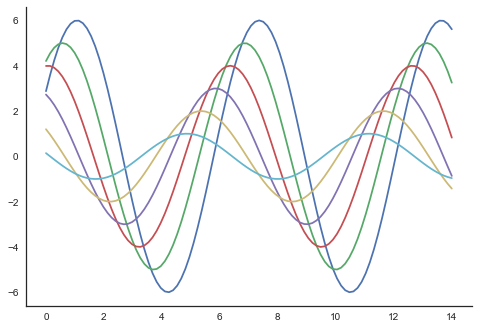

In [65]:
sns.set_style("white")
sinplot() # 默认无参数状态，就是删除上方和右方的边框
sns.despine()

# 往despine()中添加参数去控制边框
# despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

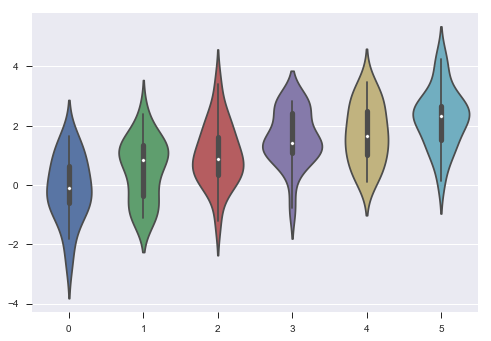

In [47]:
#一些图的边框可以通过数据移位，当然调用despine()也能做同样的事。当边框没有覆盖整个数据轴的范围的时候，trim参数会限制留存的边框范围。
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=0, trim=True,left=False); 

###  通过 plotting_context() 和 set_context() 调整绘图元素
+ 1. 通过sns.set()重置参数（四种预设，按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster。notebook的样式是默认的，上面的绘图都是使用默认的notebook预设）


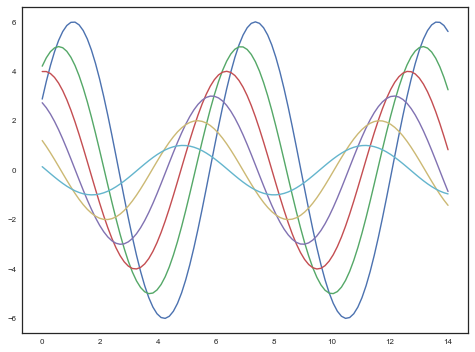

In [66]:
sns.set_context("paper")
plt.figure(figsize=(8,6))
sinplot()

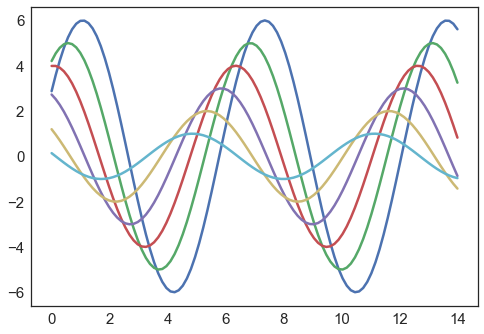

In [67]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

## 2 [斑驳陆离的调色板](https://zhuanlan.zhihu.com/p/27471537)
+ 通过color_palette()创建调色板
+ cubehelix_palette()函数的连续调色板
+ 使用light_palette() 和dark_palette()调用定制连续调色板
+ 常用色彩总结：
    + 分类：hls husl Paired Set1~Set3（色调不同）
    + 连续：Blues[蓝s，颜色+s] BuGn[蓝绿] cubehelix（同色系渐变）
    + 离散：BrBG[棕绿] RdBu[红蓝] coolwarm[冷暖]（双色对称）

### 通过color_palette()创建调色板
+ 默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, 和 colorblind
+ 当有六种以上分类要区分，可使用圆形颜色系统

In [70]:
sns.set()

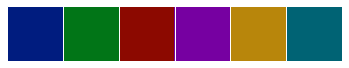

In [71]:
current_palette = sns.color_palette("dark") # 直接传入对应的参数即可变化
sns.palplot(current_palette)

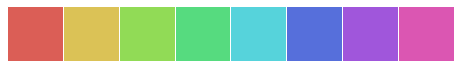

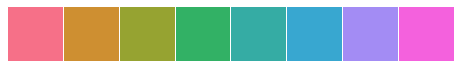

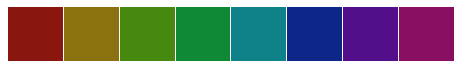

In [74]:
# 圆形颜色系统，最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换
# 可以使用hls_palette()函数来控制颜色的亮度和饱和
sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("husl", 8))
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

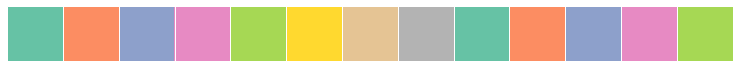

In [76]:
sns.palplot(sns.color_palette("Set2", 13))

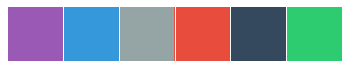

In [77]:
# 自定义颜色表
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

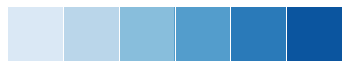

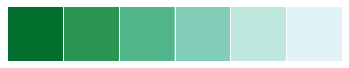

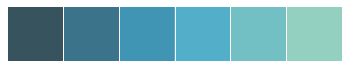

In [80]:
# 连续色板，以在调色板中的主导颜色(或颜色)命名
sns.palplot(sns.color_palette("Blues"))
# 翻转渐变，在面板名称中添加一个_r后缀
sns.palplot(sns.color_palette("BuGn_r"))
# 允许暗处理颜色，需要在面板名称中添加一个_d后缀
sns.palplot(sns.color_palette("GnBu_d"))

### cubehelix_palette()函数的连续调色板
+ cubehelix调色板系统具有线性增加或降低亮度和色调变化顺序的调色板

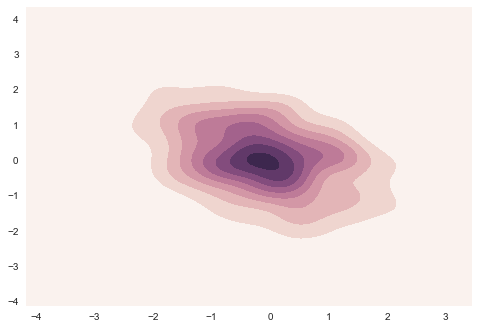

In [82]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

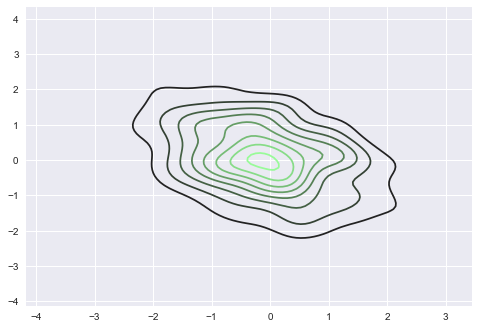

In [83]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

## 3 分布数据集的可视化
+ 单变量分布
+ 双变量分布

### 单变量分布
+ 直方图
+ 核密度估计
+ 拟合参数分布

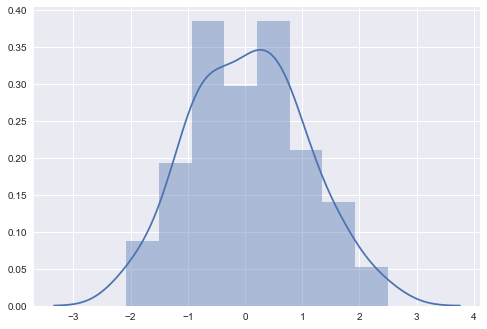

In [85]:
x = np.random.normal(size=100)
sns.distplot(x);
# sns.distplot(x, bins=20, kde=False, rug=True，hist=False,); bins设置可以更改数据的展示

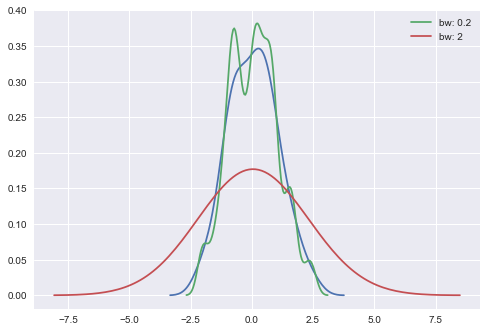

In [87]:
# sns.kdeplot(x, shade=True);
# KDE的带宽bandwidth（bw）参数控制估计对数据的拟合程度
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

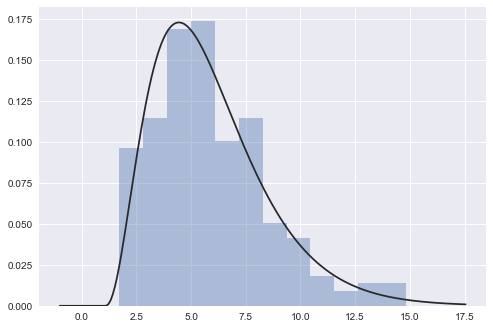

In [92]:
#拟合参数分布
# 还可以使用distplot()将参数分布拟合到数据集，并可视化地评估其与观察数据的对应关系
from scipy import stats
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### 绘制双变量分布
在绘制两个变量的双变量分布也是有用的。在seaborn中这样做的最简单的方法就是在jointplot()函数中创建一个多面板数字，显示两个变量之间的双变量（或联合）关系以及每个变量的单变量（或边际）分布和轴。
+ 绘制双变量分布
+ 散点图
+ HexBin图
+ 核密度估计
+ 呈现数据集中成对的关系

In [94]:
import pandas as pd

In [101]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])


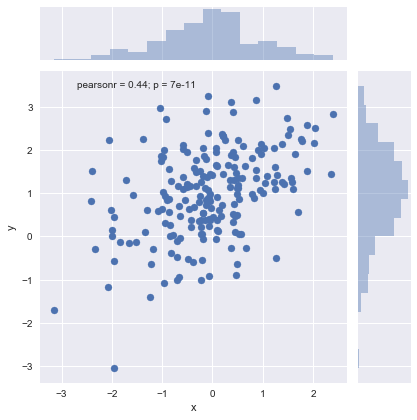

In [102]:
# 散点图
sns.jointplot(x="x", y="y", data=df);

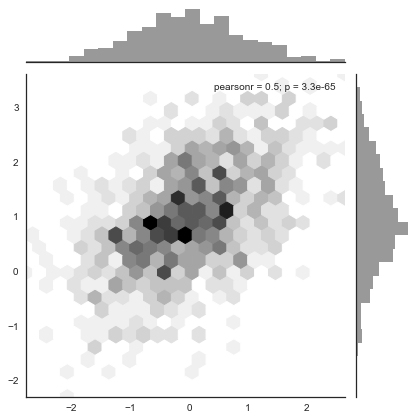

In [103]:
# HexBin图 
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

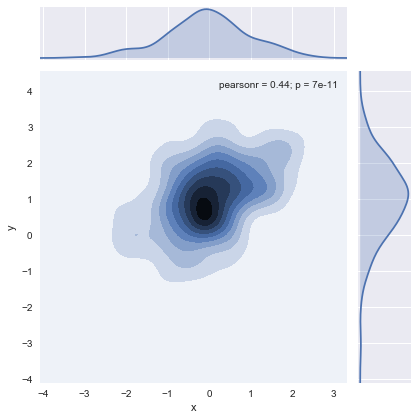

In [104]:
# 核密度估计
sns.jointplot(x="x", y="y", data=df, kind="kde");

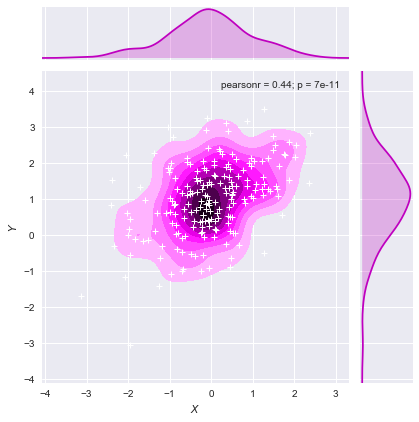

In [105]:
# ointplot()函数使用JointGrid来管理。为了获得更多的灵活性，您可能需要直接使用JointGrid绘制图形。jointplot()在绘制后返回JointGrid对象，您可以使用它来添加更多图层或调整可视化的其他方面
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

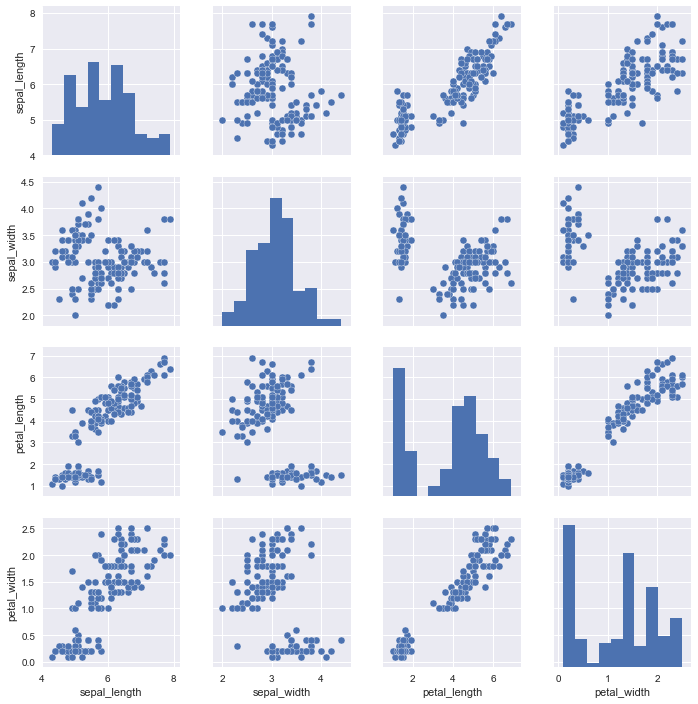

In [106]:
# 呈现数据集中成对的关系
iris = sns.load_dataset("iris")
sns.pairplot(iris);

D:\programFiles\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


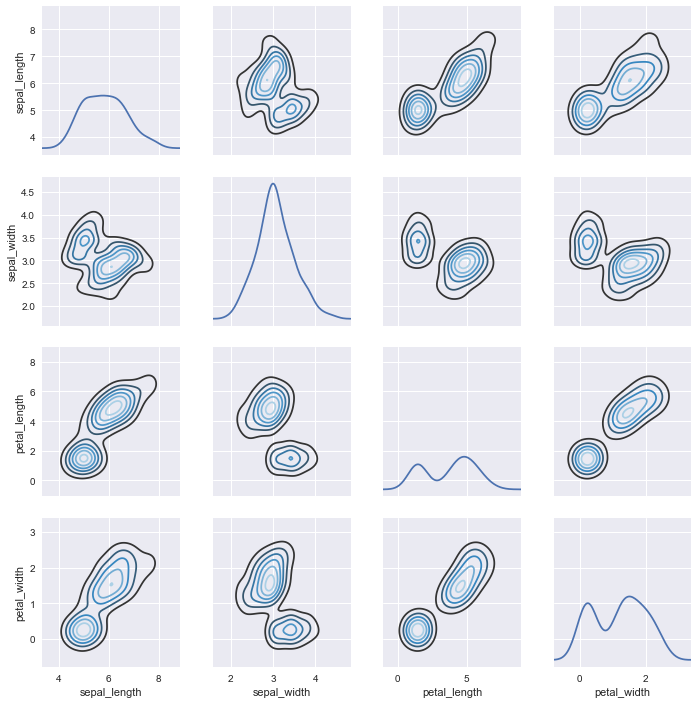

In [107]:
# 对于jointplot()和JointGrid之间的关系，pairplot()函数是建立在一个PairGrid对象上的，可以直接使用它来获得更大的灵活性
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## 4 线性关系的可视化
+ 绘制线性回归模型的函数
+ 不同类型的模型拟合
+ 调节其他变量
+ 控制绘制的大小和形状
+ 在其他背景下绘制回归

In [109]:
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

### 绘制线性回归模型的函数

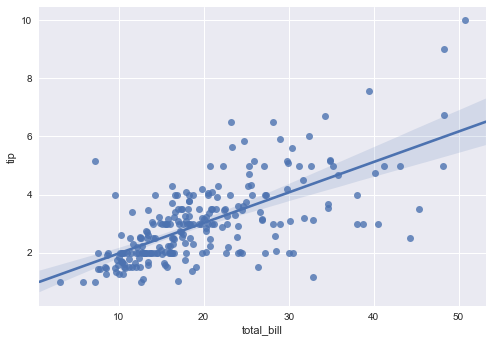

In [111]:
sns.regplot(x="total_bill", y="tip", data=tips);

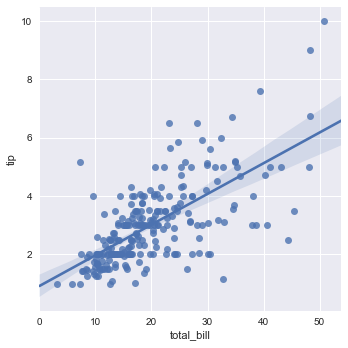

In [112]:
sns.lmplot(x="total_bill", y="tip", data=tips);

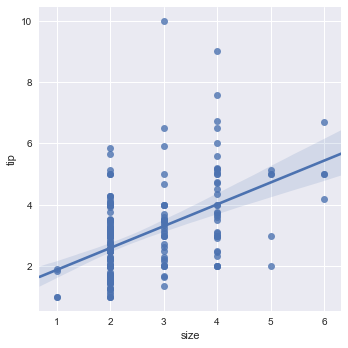

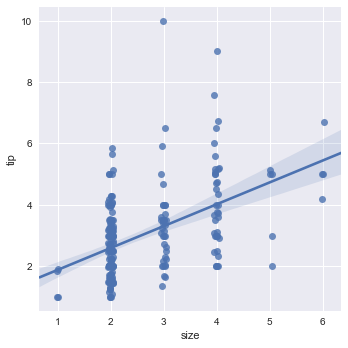

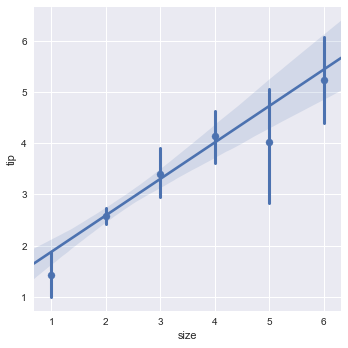

In [116]:
#当其中一个变量取值为离散型的时候，可以拟合一个线性回归。然而，这种数据集生成的简单散点图通常不是最优的
# 一个常用的方法是为离散值添加一些随机噪声的“抖动”(jitter)，使得这些值的分布更加明晰。
# 另一种选择是在每个独立的数据分组中对观察结果进行折叠，以绘制中心趋势的估计以及置信
sns.lmplot(data=tips,x="size",y="tip");
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 不同类型的模型拟合

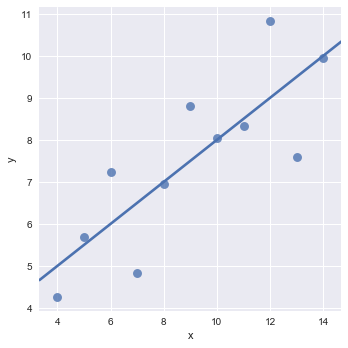

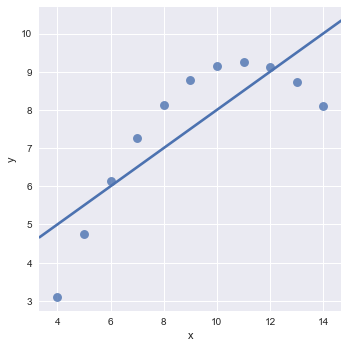

In [118]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

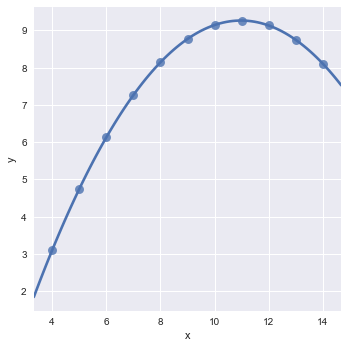

In [119]:
# 存在这些高阶关系的情况下，lmplot()和regplot()可以拟合多项式回归模型来拟合数据集中的简单类型的非线性趋势
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

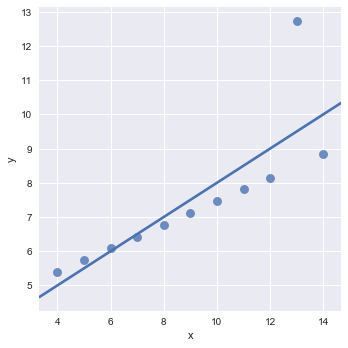

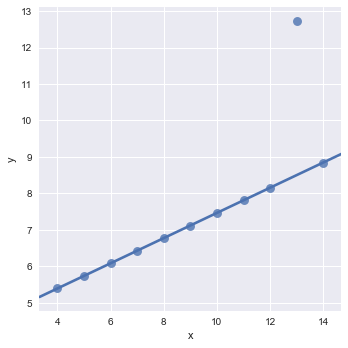

In [120]:
# “异常值”,使用不同的损失函数来减小相对较大的残差，拟合一个健壮的回归模型，传入robust=True
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

逻辑回归估计比简单回归计算密集程度（Robust回归也是如此），
并且由于使用引导程序计算回归线周围的置信区间，
您可能希望将其关闭获得更快的迭代速度（使用参数ci=None）。

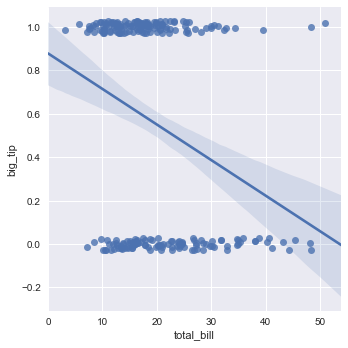

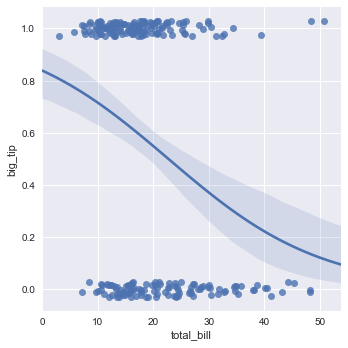

In [121]:
# 当y变量是二进制时,解决方案是拟合逻辑(Logistic)回归
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,y_jitter=.03);
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);

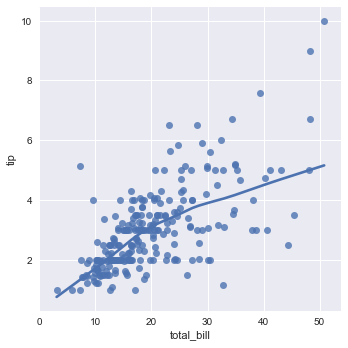

In [123]:
# 使用一个lowess smoother拟合非参数回归,这种方法具有最少的假设，
# 尽管它是计算密集型的，因此目前根本不计算置信区间
sns.lmplot(x="total_bill", y="tip", data=tips,lowess=True);

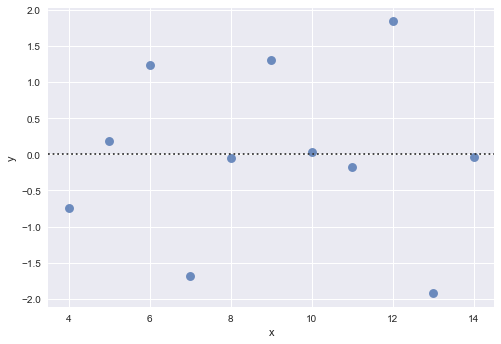

In [127]:
# 绘制残差图 residplot
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),scatter_kws={"s": 80});

###  调节其他变量

regplot()和lmplot()之间的区别。 虽然regplot()总是显示单个关系，
lmplot()将regplot()与FacetGrid结合在一起，提供了一个简单的界面，
可以在“faceted”图上显示线性回归，从而允许您探索与多达三个其他类别变量的交互。

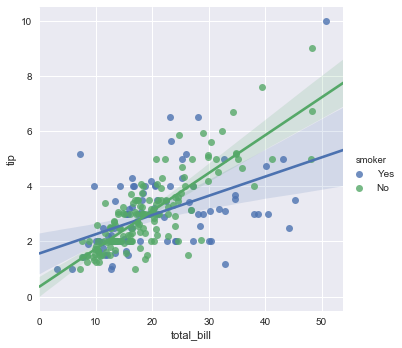

In [125]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

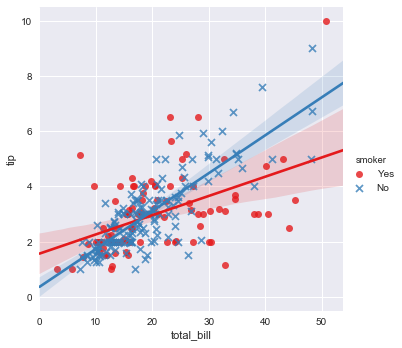

In [128]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1");

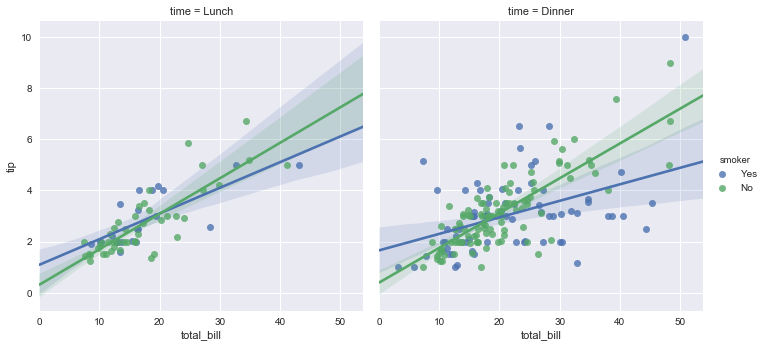

In [129]:
# 要添加另一个变量，您可以绘制多个“facet”，每个级别的变量出现在网格的行或列中：
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

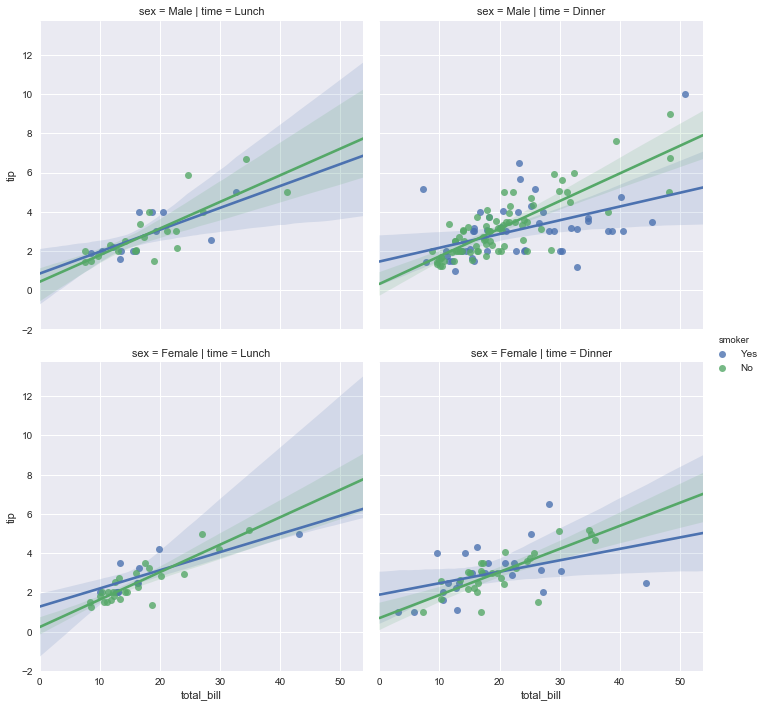

In [130]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips);

### 控制绘制的大小和形状
lmplot()图的大小和形状通过FacetGrid界面使用size和aspect参数进行控制，
这些参数适用于每个图中的设置，而不是整体图形

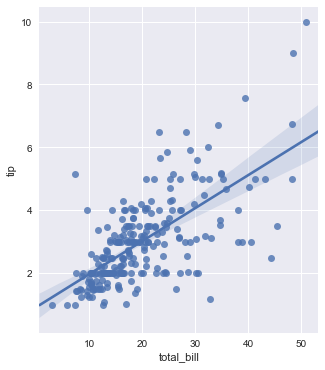

In [131]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

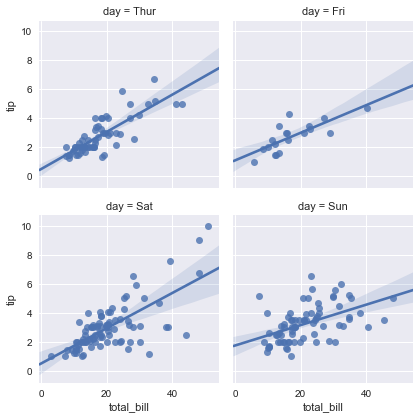

In [132]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,col_wrap=2, size=3);

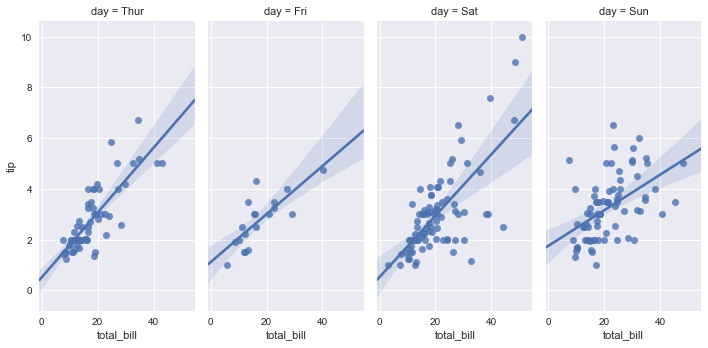

In [133]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,aspect=.5);

## 5 分类数据的绘制
非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：
+ 第一个包括函数swarmplot()和stripplot()
+ 第二个包括函数boxplot()和violinplot()
+ 第三个包括函数barplot()和pointplt()

In [134]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 分类散点图

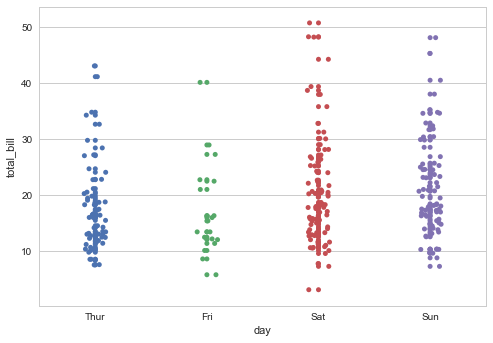

In [136]:
sns.stripplot(x="day", y="total_bill", data=tips) # 条纹图中，散点图通常将重叠
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True); # 使用一些随机的“抖动”调整位置

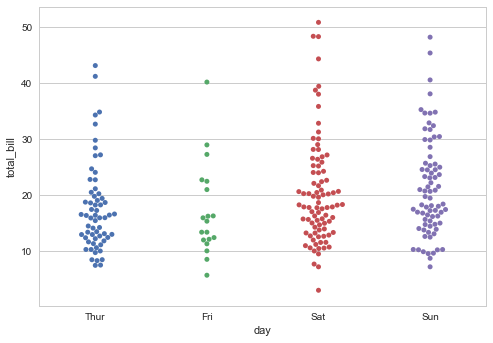

In [137]:
sns.swarmplot(x="day", y="total_bill", data=tips);#swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位：

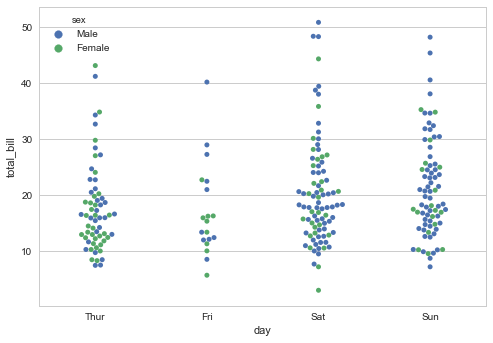

In [138]:
#Seaborn分类绘图功能试图从数据中推断类别的顺序
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);#hue参数添加多个嵌套的分类变量

### 分类内的观测分布
分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）。 有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息，我们快速讨论并比较一些适合这类数据观测的函数。
+ 箱线图
+ 提琴图:核密度估计
+ 

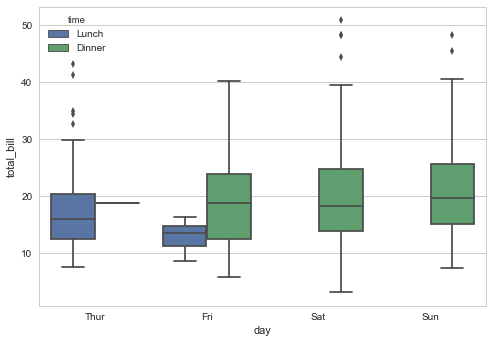

In [139]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

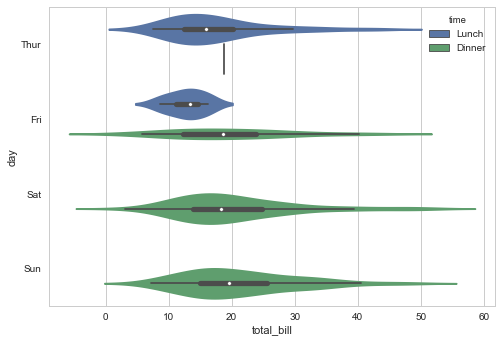

In [140]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

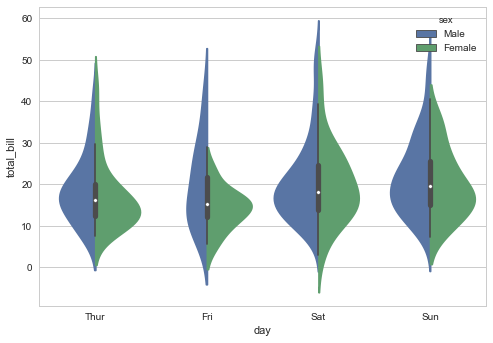

In [141]:
# 当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间：
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

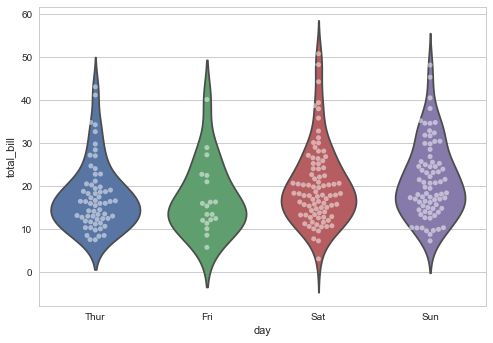

In [142]:
# 将swarmplot()或者swarmplot()与violinplot()或boxplot()结合使用可以显示每
# 个观察结果以及分布的摘要
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

### 类别内的统计估计

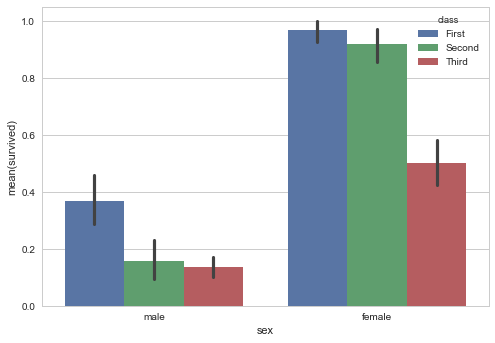

In [143]:
# 条形图
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

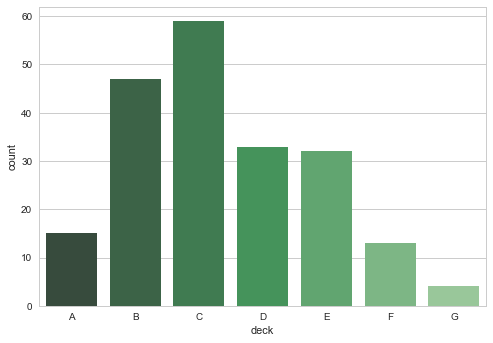

In [144]:
# 条形图
sns.countplot(x="deck", data=titanic, palette="Greens_d");

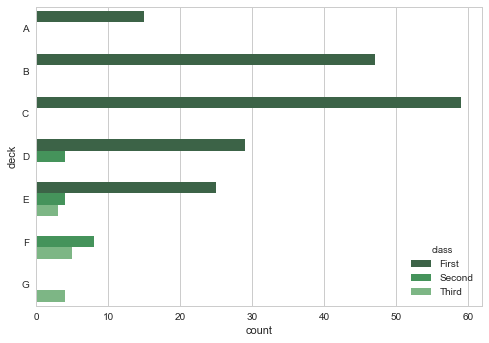

In [145]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

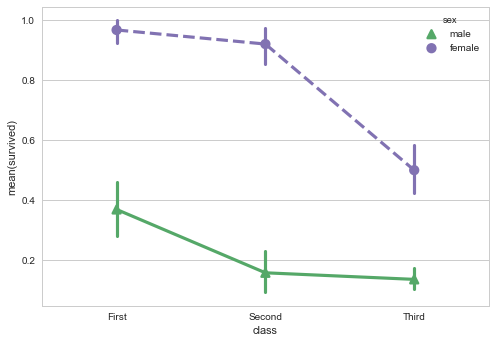

In [147]:
#点图
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

Parameters：

+ x,y,hue 数据集变量 变量名
+ date 数据集 数据集名
+ row,col 更多分类变量进行平铺显示 变量名
+ col_wrap 每行的最高平铺数 整数
+ estimator 在每个分类中进行矢量到标量的映射 矢量
+ ci 置信区间 浮点数或None
+ n_boot 计算置信区间时使用的引导迭代次数 整数
+ units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
+ order, hue_order 对应排序列表 字符串列表
+ row_order, col_order 对应排序列表 字符串列表
+ kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点（具体图形参考文章前部的分类介绍）
+ size 每个面的高度（英寸） 标量
+ aspect 纵横比 标量
+ orient 方向 "v"/"h"
+ color 颜色 matplotlib颜色
+ palette 调色板 seaborn颜色色板或字典
+ legend hue的信息面板 True/False
+ legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
+ share{x,y} 共享轴线 True/False
+ facet_kws FacetGrid的其他参数 字典

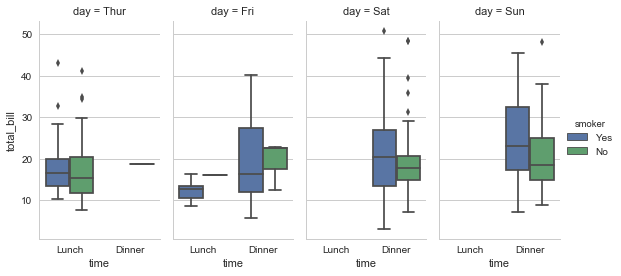

In [148]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

+ FacetGrid

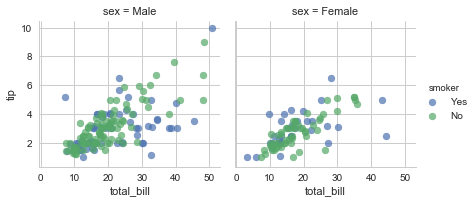

In [151]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

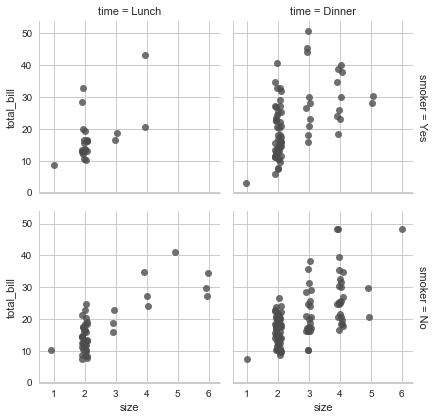

In [152]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

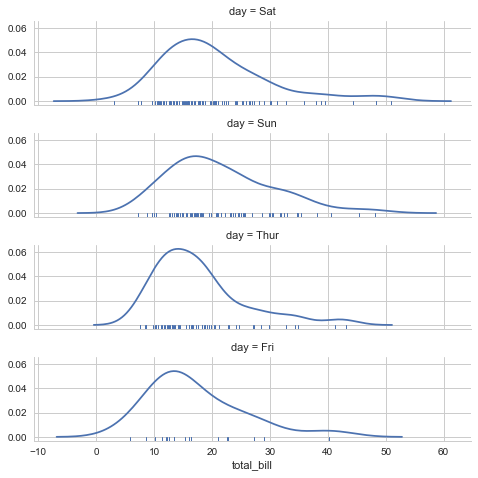

In [153]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

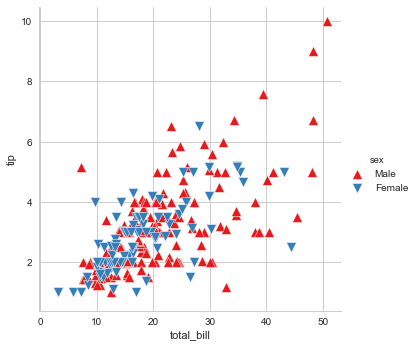

In [154]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

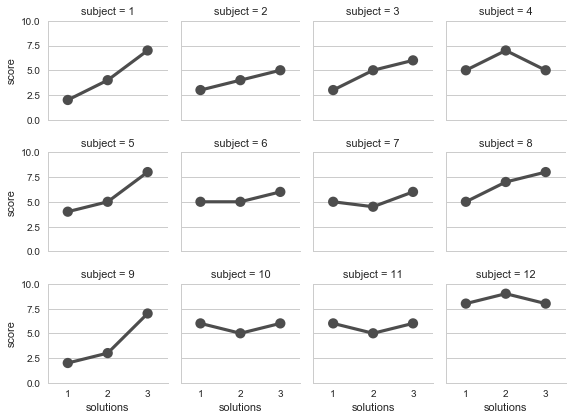

In [155]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

[将自定义函数应用在网格上](https://zhuanlan.zhihu.com/p/27816821)

In [13]:
import matplotlib.pyplot as plt

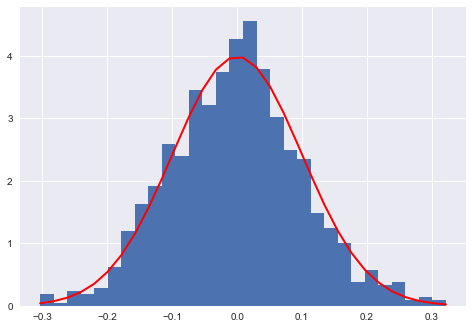

In [81]:
mu, sigma = 0, 0.1
s = np.random.normal(0, 0.1, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r');

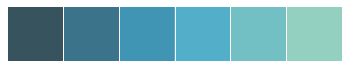

In [61]:
sns.set_style("darkgrid", {"xtick.major.size": 0, "ytick.major.size": 0})
# sns.despine(offset=0, trim=False)
sns.palplot(sns.color_palette("GnBu_d"));